In [1]:
import graph_load
import graph_model
import torch
from sklearn.metrics import accuracy_score, recall_score, precision_score, fbeta_score, f1_score, roc_curve, RocCurveDisplay, auc
import numpy as np
import matplotlib.pyplot as plt

In [2]:
device = 'cuda'
data_dir = './tnf/'
#data_dir = './yfp/'


In [3]:
def test(test_loader, model):
    model.eval()
    pred_all = []
    target_all = []
    out_all = []

    with torch.no_grad():
        for data in test_loader:
            data.to(device)
            out = model(data.x, data.edge_index, data.batch)
            out_all.append(out)
            #pred = out.argmax(dim=1)
            #pred_all.append(pred)
            target_all.append(data.y)

        out_all = torch.cat(out_all, dim=0)
        #pred_all = torch.cat(pred_all, dim=0)
        target_all = torch.cat(target_all, dim=0)

    return target_all, out_all

print(f"Test acc: {accuracy_score(target_test.cpu(), pred_test.cpu())}")
print(f"Test prec: {precision_score(target_test.cpu(), pred_test.cpu())}")
print(f"Test rec: {recall_score(target_test.cpu(), pred_test.cpu())}")
print(f"Test F1: {f1_score(target_test.cpu(), pred_test.cpu())}")  
print(f"Test F2: {fbeta_score(target_test.cpu(), pred_test.cpu(), beta=2.0)}")
print(f"Total: {target_test.cpu().shape}, total positive: {target_test.cpu().sum()}")
print(f"Wrongly predicted: {wrong_pred}, wrongly predicted positive: {wrong_pos}") 


In [4]:
targets = []
outs = []
preds = []
for split in range(5):
    model = graph_model.GCNMid().to(device)
    train_loader, val_loader, test_loader = graph_load.LoadGraphData(data_dir, 256, 256, split)
    model.cuda()
    model.load_state_dict(torch.load(f'./8-20_split_{split}.pt'))
    target_test, out_test = test(test_loader, model)
    _, pred_test = torch.max(out_test.data, 1)
    out_test = torch.nn.functional.softmax(out_test.data, 1)[:, 1]
    wrong_pos = (target_test * (target_test != pred_test)).sum()
    wrong_pred = ((target_test != pred_test)).sum()
    targets.append(target_test.cpu())
    outs.append(out_test.cpu())
    preds.append(pred_test.cpu())

In [5]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

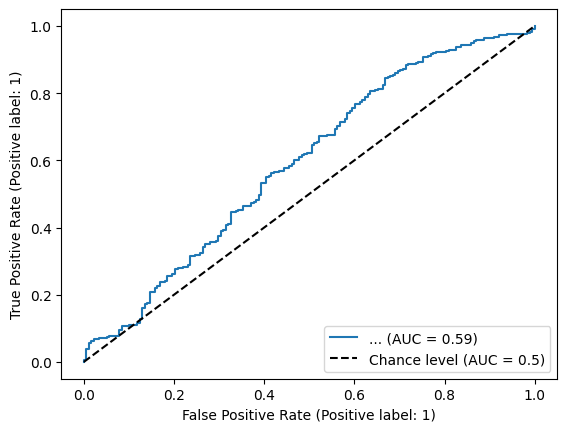

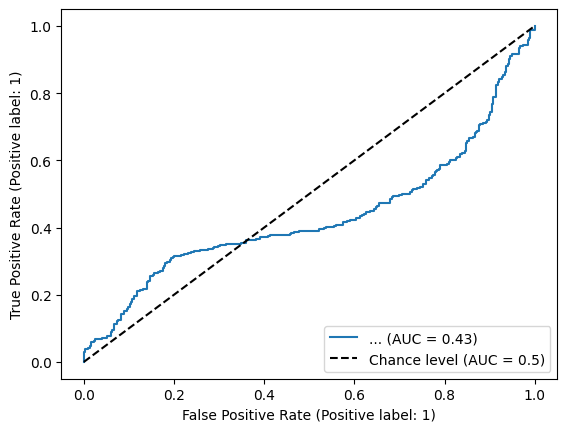

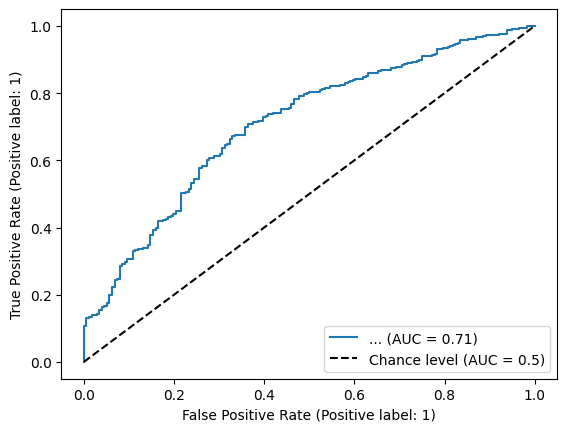

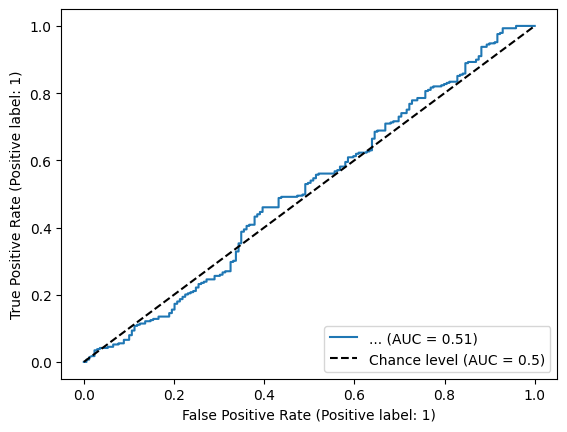

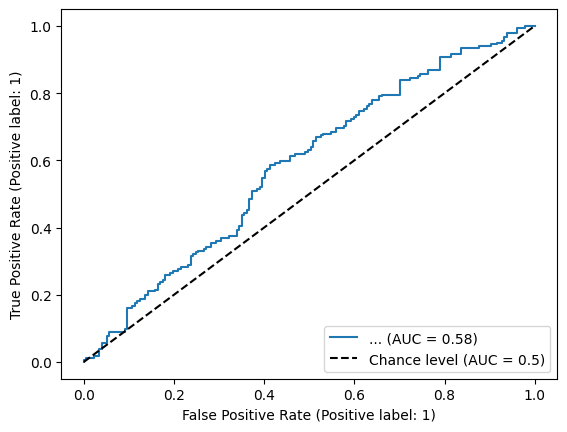

In [6]:
for split in range(5):
    display = RocCurveDisplay.from_predictions(targets[split], outs[split], name="...", plot_chance_level=True)
    interp_tpr = np.interp(mean_fpr, display.fpr, display.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(display.roc_auc)

In [7]:
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

In [8]:
chance_x = np.linspace(0, 1, 100)
chance_y = np.linspace(0, 1, 100)

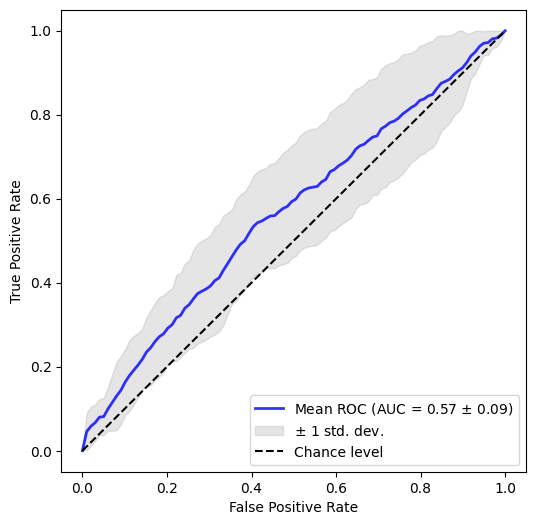

In [9]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.plot(chance_x, chance_y, linestyle='dashed', color='black', label='Chance level')

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
)
ax.legend(loc="lower right")
plt.show()

In [10]:
mean_fpr = np.linspace(0, 1, 100)

In [11]:
tprs.pop(1)

array([0.        , 0.0408805 , 0.05974843, 0.06918239, 0.06918239,
       0.07232704, 0.08805031, 0.11320755, 0.12578616, 0.1509434 ,
       0.16352201, 0.19496855, 0.21069182, 0.21698113, 0.23899371,
       0.25471698, 0.26415094, 0.27044025, 0.29559748, 0.30188679,
       0.31446541, 0.31446541, 0.32075472, 0.32389937, 0.32704403,
       0.33018868, 0.33333333, 0.33333333, 0.33647799, 0.3427673 ,
       0.3490566 , 0.3490566 , 0.35220126, 0.35220126, 0.35220126,
       0.35534591, 0.36163522, 0.36163522, 0.36477987, 0.37106918,
       0.37106918, 0.37735849, 0.37735849, 0.37735849, 0.37735849,
       0.37735849, 0.3836478 , 0.38679245, 0.38993711, 0.38993711,
       0.38993711, 0.38993711, 0.39622642, 0.39937107, 0.40251572,
       0.40566038, 0.40880503, 0.41509434, 0.41823899, 0.42138365,
       0.42767296, 0.43710692, 0.44654088, 0.44968553, 0.45597484,
       0.47169811, 0.47169811, 0.47169811, 0.49371069, 0.49371069,
       0.5       , 0.5       , 0.51257862, 0.51572327, 0.52201

In [12]:
tprs.pop(2)

array([0.        , 0.00692042, 0.01730104, 0.03806228, 0.04152249,
       0.04152249, 0.0449827 , 0.05190311, 0.05536332, 0.06574394,
       0.07958478, 0.09342561, 0.11072664, 0.11418685, 0.12110727,
       0.12456747, 0.12802768, 0.1349481 , 0.1349481 , 0.14532872,
       0.17301038, 0.1799308 , 0.19377163, 0.20415225, 0.20761246,
       0.22145329, 0.23529412, 0.24567474, 0.24567474, 0.25605536,
       0.25951557, 0.26643599, 0.26989619, 0.30103806, 0.35294118,
       0.38754325, 0.40484429, 0.4083045 , 0.43252595, 0.44636678,
       0.46020761, 0.46020761, 0.46020761, 0.48788927, 0.49134948,
       0.49134948, 0.49134948, 0.49480969, 0.49480969, 0.52941176,
       0.53979239, 0.55709343, 0.56055363, 0.56055363, 0.56055363,
       0.56055363, 0.57093426, 0.58131488, 0.60899654, 0.60899654,
       0.61937716, 0.62283737, 0.62283737, 0.62975779, 0.68512111,
       0.68858131, 0.68858131, 0.70934256, 0.71626298, 0.71626298,
       0.74048443, 0.75086505, 0.76816609, 0.77854671, 0.78546

In [13]:
aucs.pop(1)
aucs.pop(2)

0.5113019798939415

In [14]:
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

In [15]:
mean_tpr

array([0.        , 0.05997299, 0.07155132, 0.07568191, 0.09641778,
       0.09752889, 0.12204544, 0.13648988, 0.15682361, 0.16737375,
       0.19096491, 0.20176216, 0.21186496, 0.22895197, 0.24220773,
       0.26503066, 0.27818363, 0.29810606, 0.30887262, 0.31469516,
       0.32406744, 0.33513168, 0.35592893, 0.36123738, 0.38757936,
       0.3957738 , 0.41330446, 0.43078825, 0.43904943, 0.44244951,
       0.45122478, 0.46968619, 0.4785282 , 0.49808454, 0.50707623,
       0.52180919, 0.54086762, 0.5628174 , 0.56739533, 0.58985753,
       0.61198767, 0.62569078, 0.63217708, 0.63335494, 0.64199672,
       0.64310783, 0.65667745, 0.66760819, 0.67454184, 0.68207251,
       0.68870848, 0.70733943, 0.71662879, 0.72253426, 0.72482322,
       0.72666484, 0.73977094, 0.74441562, 0.76453828, 0.77220244,
       0.78164147, 0.78768043, 0.79645569, 0.81120317, 0.81606427,
       0.82314759, 0.82963389, 0.83787888, 0.84134571, 0.84599039,
       0.86412343, 0.87105708, 0.87518767, 0.87636552, 0.88344

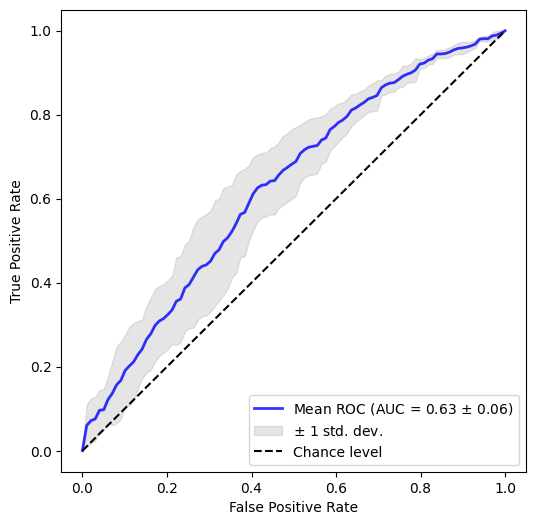

In [16]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.plot(chance_x, chance_y, linestyle='dashed', color='black', label='Chance level')

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
)
ax.legend(loc="lower right")
plt.show()